# Небольшое кафе в Москве

Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Описание данных
    
    
    ### Таблица rest_data:

    * id — идентификатор объекта;
    * object_name — название объекта общественного питания;
    * chain — сетевой ресторан;
    * object_type — тип объекта общественного питания;
    * address — адрес;
    * number — количество посадочных мест.



    Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
    
    Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
    
    Для какого вида объекта общественного питания характерно сетевое распространение?
    
    Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало       заведений с большим количеством посадочных мест?
    
    Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид             предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
    
    Выделите в отдельный столбец информацию об улице из столбца address .
    
    Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней               информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    
    Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на     вопрос — в каких районах Москвы находятся эти улицы?
    
    Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного     питания. Какие закономерности можно выявить?
    
    
    Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный         инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в         markdown-ячейке в формате:

    Презентация: <ссылка на облачное хранилище с презентацией> 

    Следуйте принципам оформления из темы «Подготовка презентации».

## Оглавление

* [Загрузка и проверка данных.](#1)

* [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#2)

* [Для какого вида объекта общественного питания характерно сетевое распространение?](#3)

* [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало       заведений с большим количеством посадочных мест?](#4)

* [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид             предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#5)

* [Выделите в отдельный столбец информацию об улице из столбца address .](#6)

* [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней               информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#7)

* [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на     вопрос — в каких районах Москвы находятся эти улицы?](#8)

* [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного     питания. Какие закономерности можно выявить?](#9)

* [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на     вопрос — в каких районах Москвы находятся эти улицы?](#10)

* [Общий вывод](#11)

* [Подготовьте презентацию исследования для инвесторов.](#12)



<a class="anchor" id="1"></a>
### Загрузка и проверка данных. 

In [1]:
#Импортирую библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Функция для анализа отдельных серий.

In [3]:
def series_analise(series):
    print('Имя столбца',series.name)
    print('Тип данных',series.dtypes)
    try: # при попадении данных не верного типа в расчет посчитает только то что можно посчитать в любом случае.
        return f"Для этого столбца Среднеее значение:{series.mean()}" + "\n" + f"Максимальное значение: {series.max()}"+ "\n" + f"Минимальное значение: {series.min()}"+ "\n" + f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"
    except:
        return f"Для этого столбца" + "\n" f"Всего наблюдений: {series.count()}" + "\n" + f"Уникальные значения: {series.unique()}"

In [4]:
print(series_analise(data['id']))

Имя столбца id
Тип данных int64
Для этого столбца Среднеее значение:119720.06690095014
Максимальное значение: 223439
Минимальное значение: 838
Всего наблюдений: 15366
Уникальные значения: [151635  77874  24309 ... 209186 221900 222535]


В обработке не нуждается.

In [5]:
print(series_analise(data['object_name']))

Имя столбца object_name
Тип данных object
Для этого столбца
Всего наблюдений: 15366
Уникальные значения: ['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']


Можно привести к нижнему регистру.

In [6]:
data['object_name']=data['object_name'].str.lower()
data['object_name']

0                       сметана
1                        родник
2               кафе «академия»
3                    пиццетория
4        кафе «вишневая метель»
                  ...          
15361               шоколадница
15362               шоколадница
15363               шоколадница
15364               шоколадница
15365               шоколадница
Name: object_name, Length: 15366, dtype: object

In [7]:
print(series_analise(data['chain']))

Имя столбца chain
Тип данных object
Для этого столбца
Всего наблюдений: 15366
Уникальные значения: ['нет' 'да']


Нужно изменит тип на булевое значение для расчетов.

In [8]:
data['chain']=data['chain'].map({'да': True, 'нет':False})
data['chain']

0        False
1        False
2        False
3         True
4        False
         ...  
15361     True
15362     True
15363     True
15364     True
15365     True
Name: chain, Length: 15366, dtype: bool

In [9]:
print(series_analise(data['object_type']))

Имя столбца object_type
Тип данных object
Для этого столбца
Всего наблюдений: 15366
Уникальные значения: ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


Длинные названия можно заменить на синонимы, понадобится для рисовки графиков.

In [10]:
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'быстрое питание')
data['object_type'] = data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
data['object_type'].unique()

/tmp/ipykernel_8755/1433843898.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['object_type'] = data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')


array(['кафе', 'столовая', 'закусочная', 'быстрое питание', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

In [11]:
print(series_analise(data['address']))

Имя столбца address
Тип данных object
Для этого столбца
Всего наблюдений: 15366
Уникальные значения: ['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13']


In [12]:
data['address']=data['address'].str.lower()
data['address']  

0               город москва, улица егора абакумова, дом 9
1        город москва, улица талалихина, дом 2/1, корпус 1
2                город москва, абельмановская улица, дом 6
3                  город москва, абрамцевская улица, дом 1
4        город москва, абрамцевская улица, дом 9, корпус 1
                               ...                        
15361         город москва, 3-й крутицкий переулок, дом 18
15362             город москва, улица земляной вал, дом 33
15363             город москва, улица земляной вал, дом 33
15364    город москва, поселение московский, киевское ш...
15365               город москва, ходынский бульвар, дом 4
Name: address, Length: 15366, dtype: object

In [13]:
print(series_analise(data['number']))

Имя столбца number
Тип данных int64
Для этого столбца Среднеее значение:59.5471820903293
Максимальное значение: 1700
Минимальное значение: 0
Всего наблюдений: 15366
Уникальные значения: [  48   35   95   40   50  240   10   90  150  120    5   24  140   32
  270  320    7    2  160   20   30  110    6  192   65   45    4  125
  100   49   63   70   22   56   38  220   78    3   80   46   15   96
   60   47  180  250  200   25   12   14   16  420   98   75   34  216
   43   54  580  159    0   28   64   67   42  124   82   36  114    8
   71   18  158   55  196   44   76  144   41   26   68  143  198   79
    1   86  148  190  202  131   52   92  300   85  102   88   84  246
   81   94   23   37   39   99   61   11  130   74  128  106   58  260
   27   19   29   13    9  168  350   93   33  105  239  104   17   62
  230  132   87   89  170   83   21  108  210   51   53  115   66  280
  126   97  356  156  428  380  138   72  118  139  236  450  194  330
  225  500  112  109  146  306  2

Не нуждается в обработке.

### Проверим дубликаты.

In [14]:
data.duplicated().sum()

0

Нет дубликатов.

#### Подготовка данных окончена.

## Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
<a class="anchor" id="2"></a>

In [15]:
object_type_set=data.groupby('object_type')['id'].count().sort_values()
object_type_set=pd.DataFrame(object_type_set) 
object_type_set.head(15)

,id
object_type,
кулинария,273
закусочная,360
кафетерий,398
буфет,585
бар,856
быстрое питание,1923
ресторан,2285
столовая,2587
кафе,6099


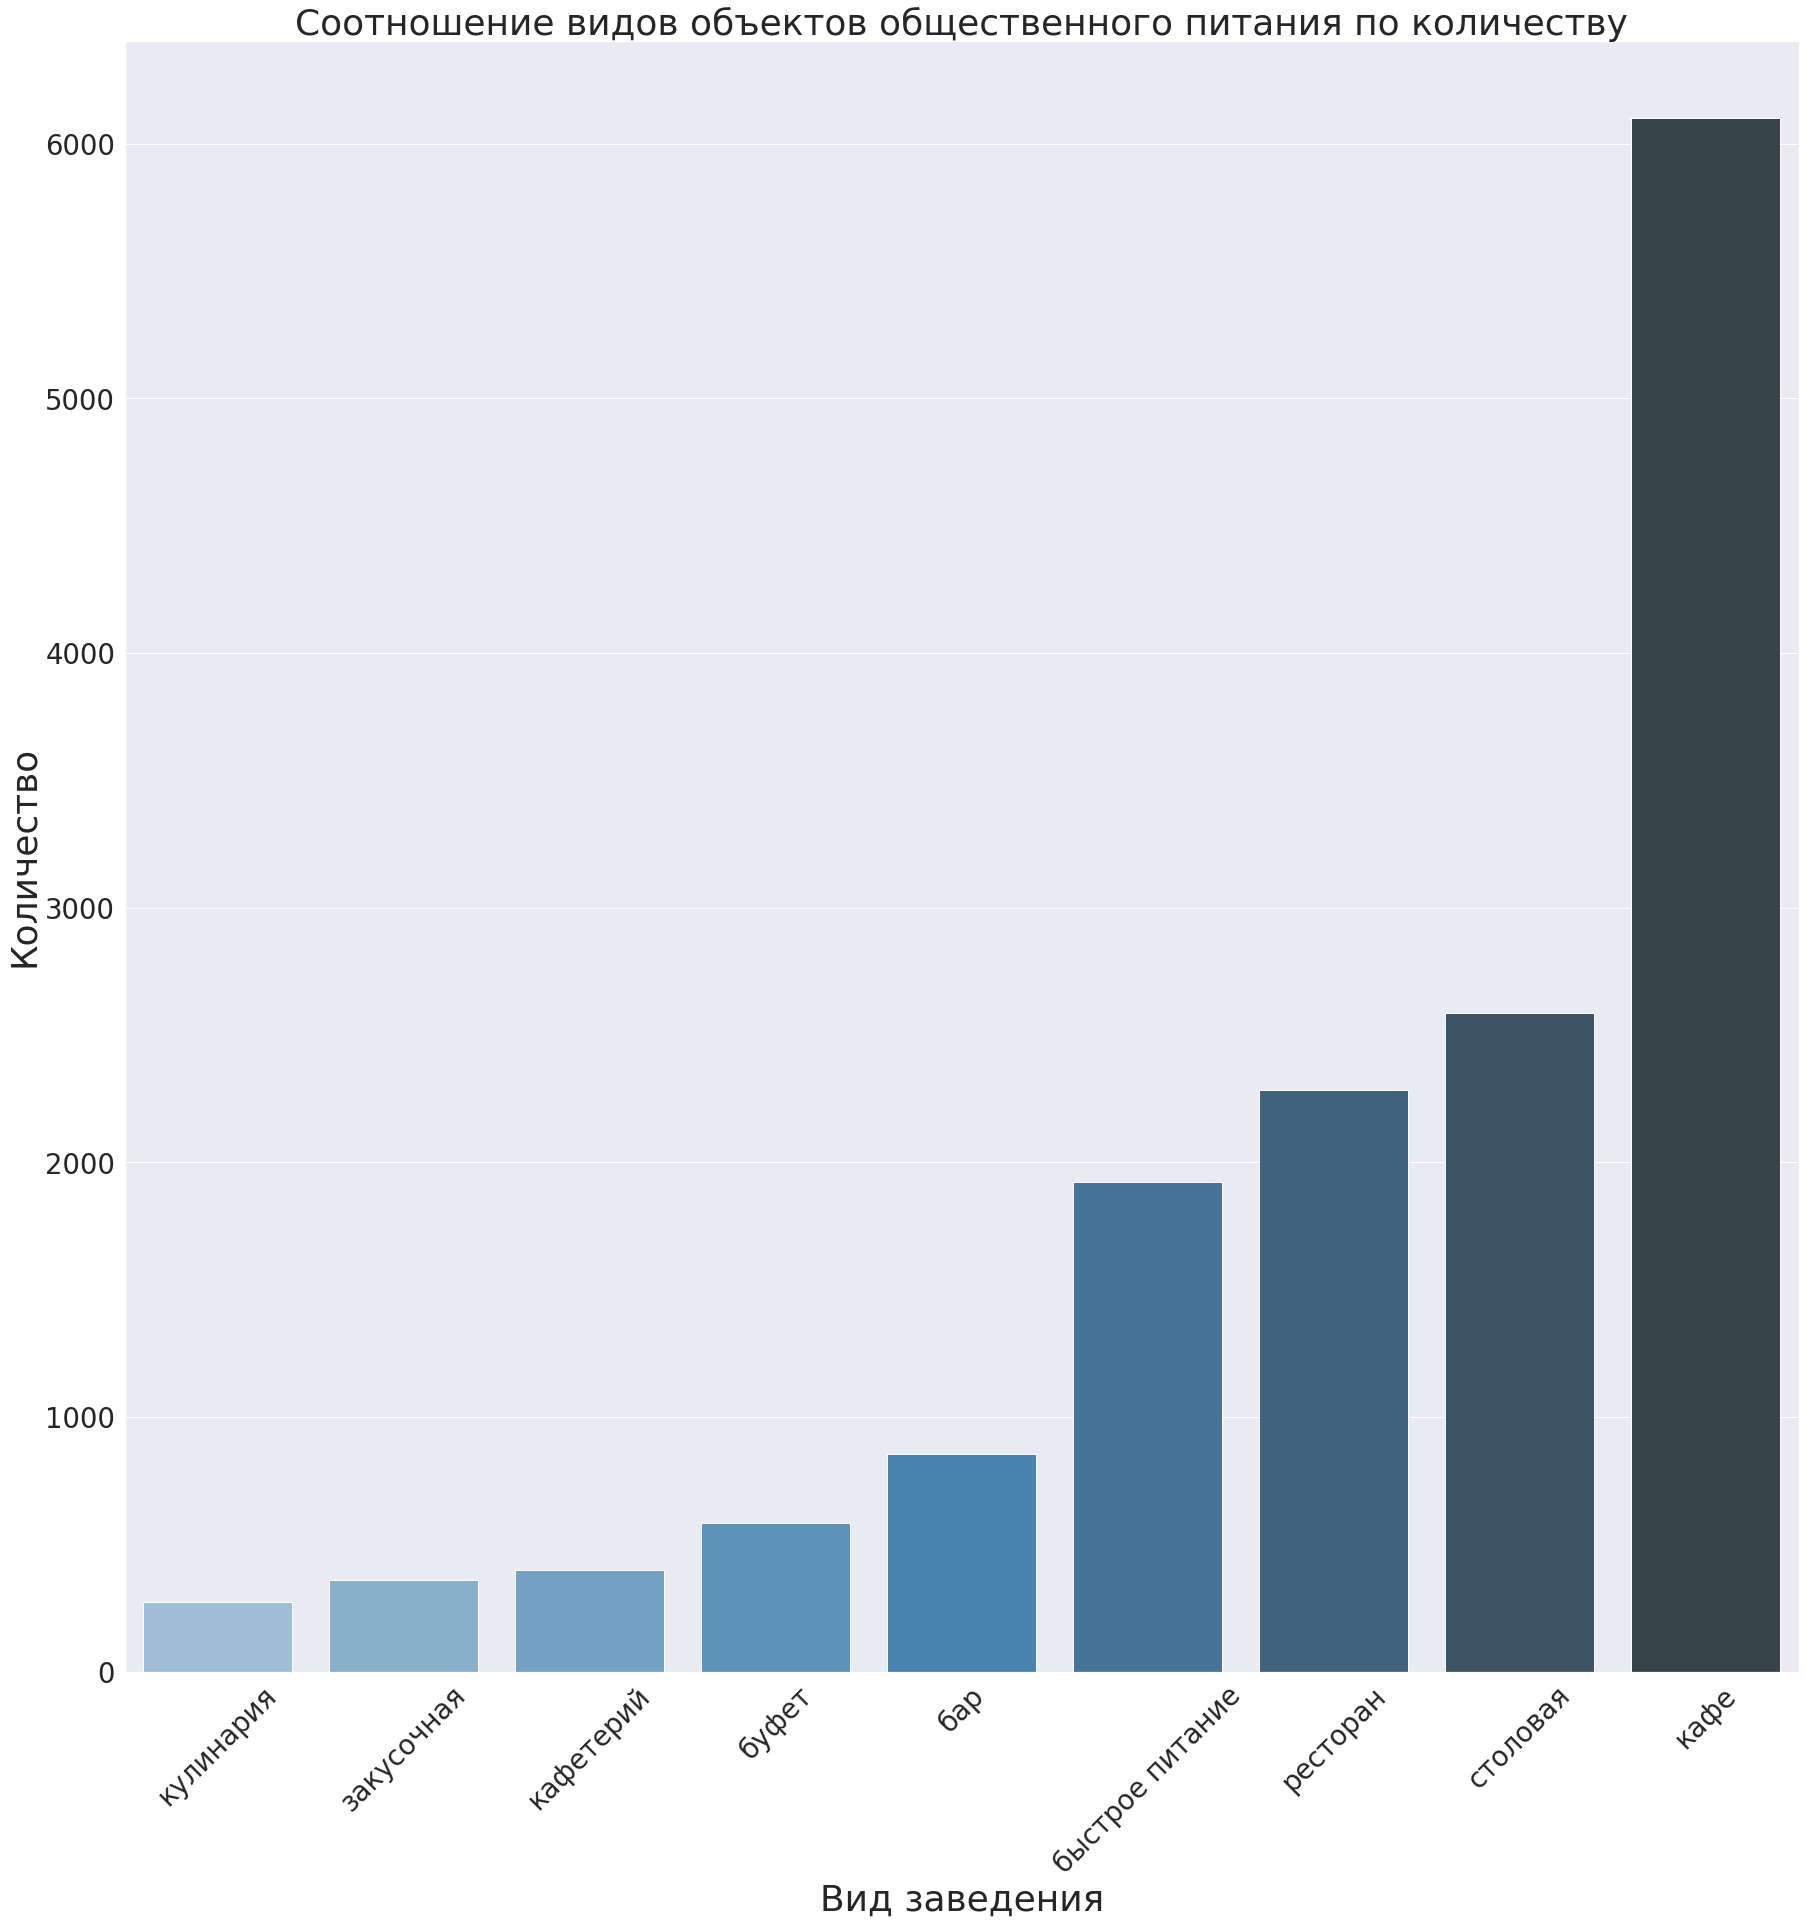

In [16]:
plt.figure(figsize=(30,30))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='id', x=object_type_set.index, data=object_type_set, palette="Blues_d") 
plt.title('Cоотношение видов объектов общественного питания по количеству', size=36)
plt.xlabel('Вид заведения', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=45)
plt.show()

#### С большим отрывом лидирует кафе. Далее - столовая, ресторан и быстрое питание.

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
<a class="anchor" id="3"></a>

In [17]:
object_chain_set=data.groupby('chain')['id'].count().sort_values()
object_chain_set=pd.DataFrame(['сетевые', 'не сетевые'],object_chain_set.values) 
object_chain_set.columns=['type']
object_chain_set.head(15)

,type
2968,сетевые
12398,не сетевые


#### Не сетевых заведений ожидаемо больше.

Сделаем график

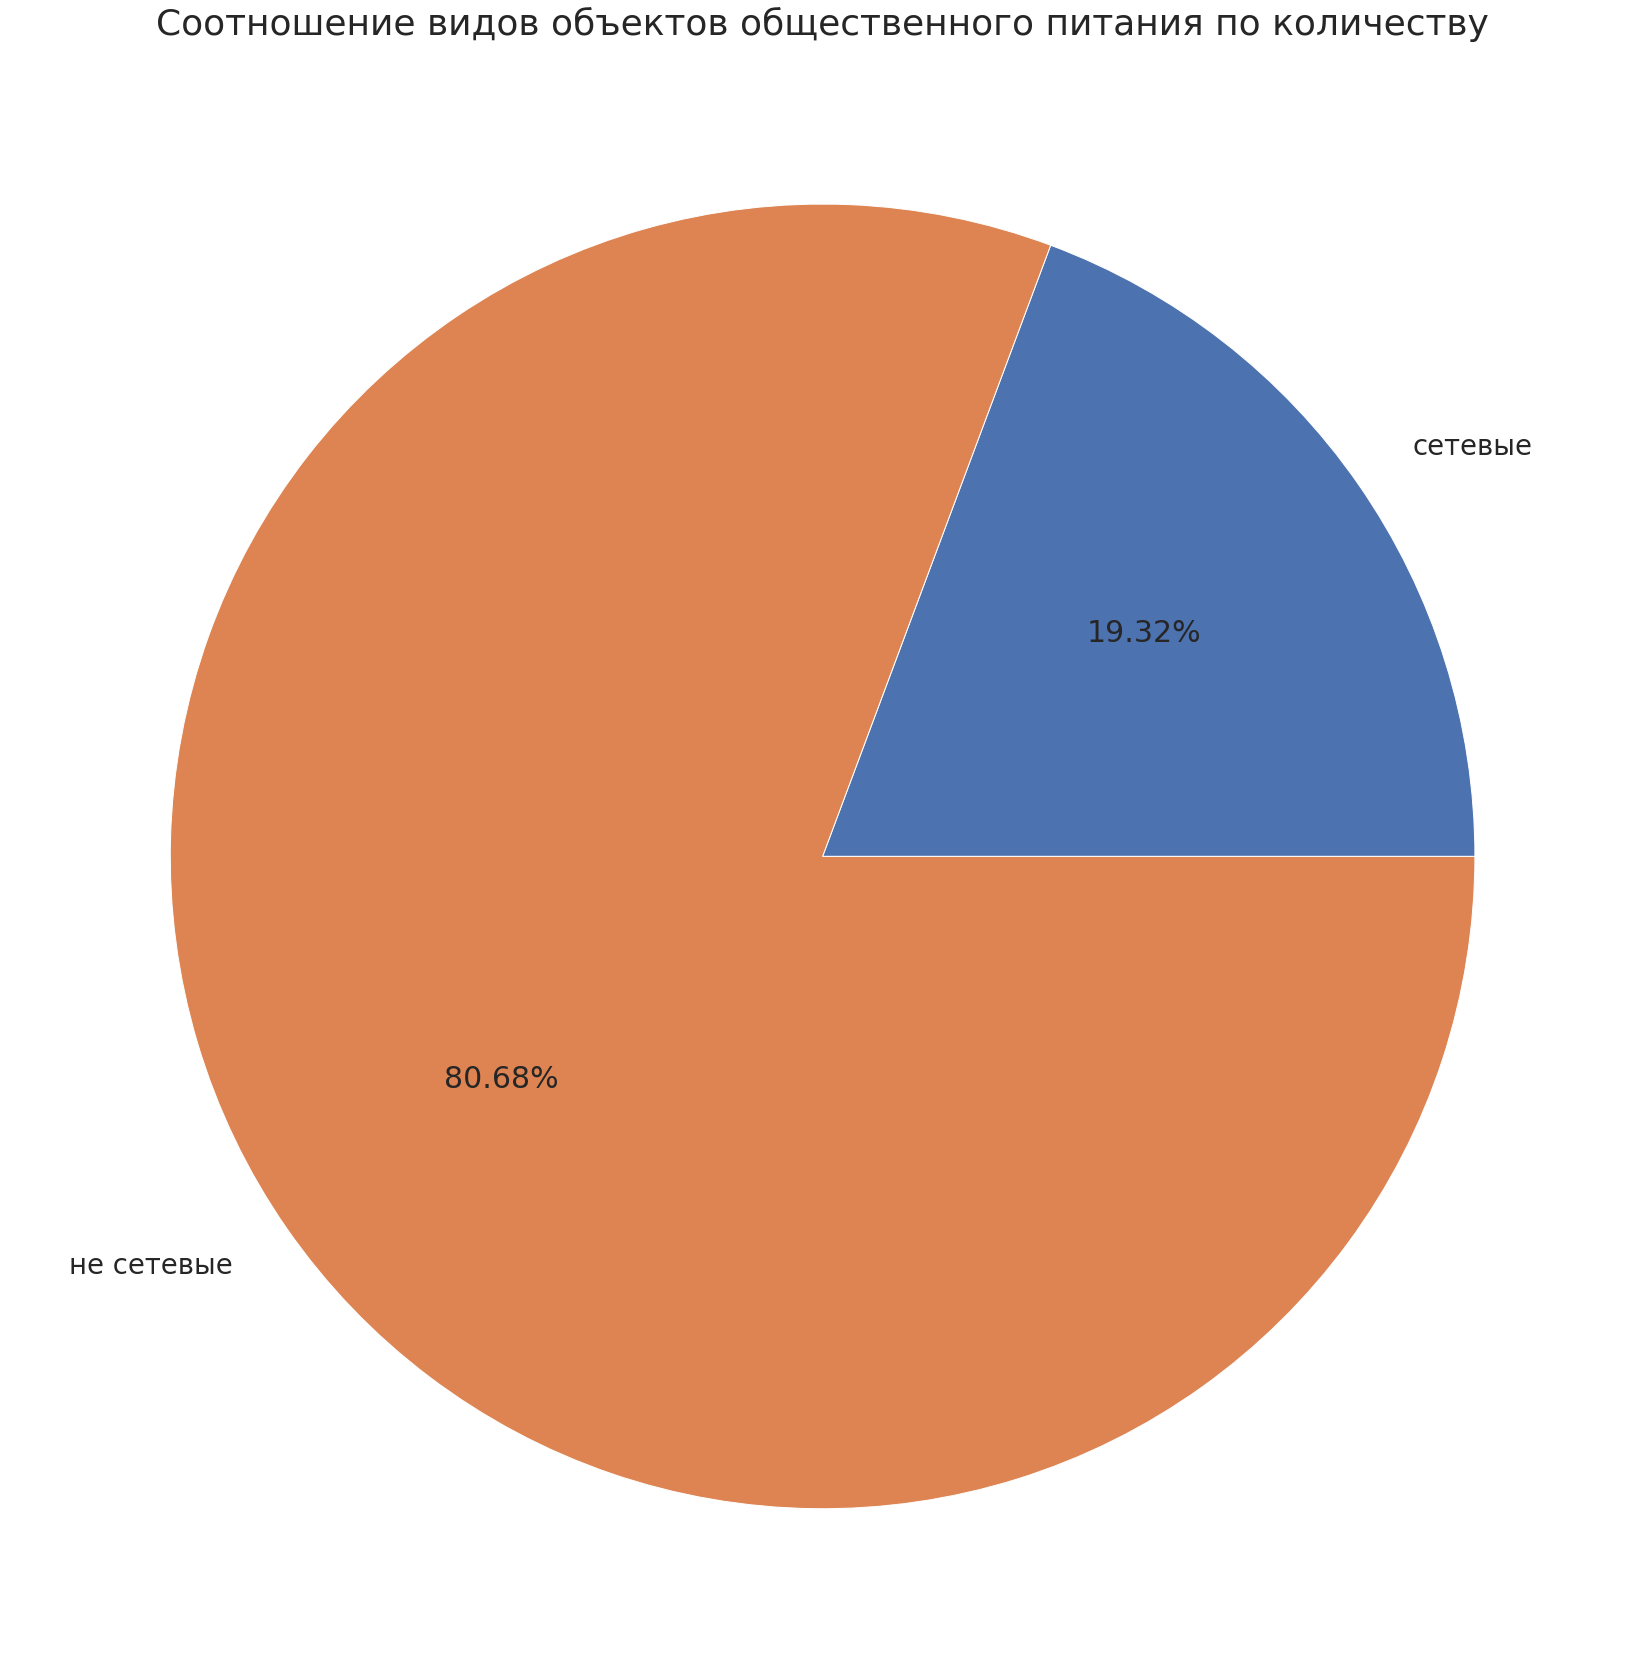

In [18]:
plt.figure(figsize=(30,30))
plt.pie(object_chain_set.index,labels=object_chain_set['type'],autopct='%1.2f%%')
plt.title('Cоотношение видов объектов общественного питания по количеству', size=36)
plt.show()

### Для какого вида объекта общественного питания характерно сетевое распространение?
<a class="anchor" id="4"></a>

In [19]:
data_chain=data.query('chain==True')
object_type_chain=data_chain.groupby('object_type')['id'].count().sort_values()
object_type_chain=pd.DataFrame(object_type_chain) 
object_type_chain.columns=['count']
object_type_chain.head(15)

,count
object_type,
столовая,3
буфет,11
бар,37
кафетерий,52
закусочная,56
кулинария,78
ресторан,544
быстрое питание,791
кафе,1396


In [20]:
object_type_chain_set = object_type_set.merge(object_type_chain, how='left', left_on='object_type', right_on='object_type')
object_type_chain_set.columns=['total','chain']
object_type_chain_set['chain_fraction']=object_type_chain_set['chain']/object_type_chain_set['total']*100
object_type_chain_set=object_type_chain_set.sort_values(by='chain_fraction',ascending = False)
object_type_chain_set

,total,chain,chain_fraction
object_type,,,
быстрое питание,1923,791,41.133645
кулинария,273,78,28.571429
ресторан,2285,544,23.807440
кафе,6099,1396,22.888998
закусочная,360,56,15.555556
кафетерий,398,52,13.065327
бар,856,37,4.322430
буфет,585,11,1.880342
столовая,2587,3,0.115964


Отрисуем график.

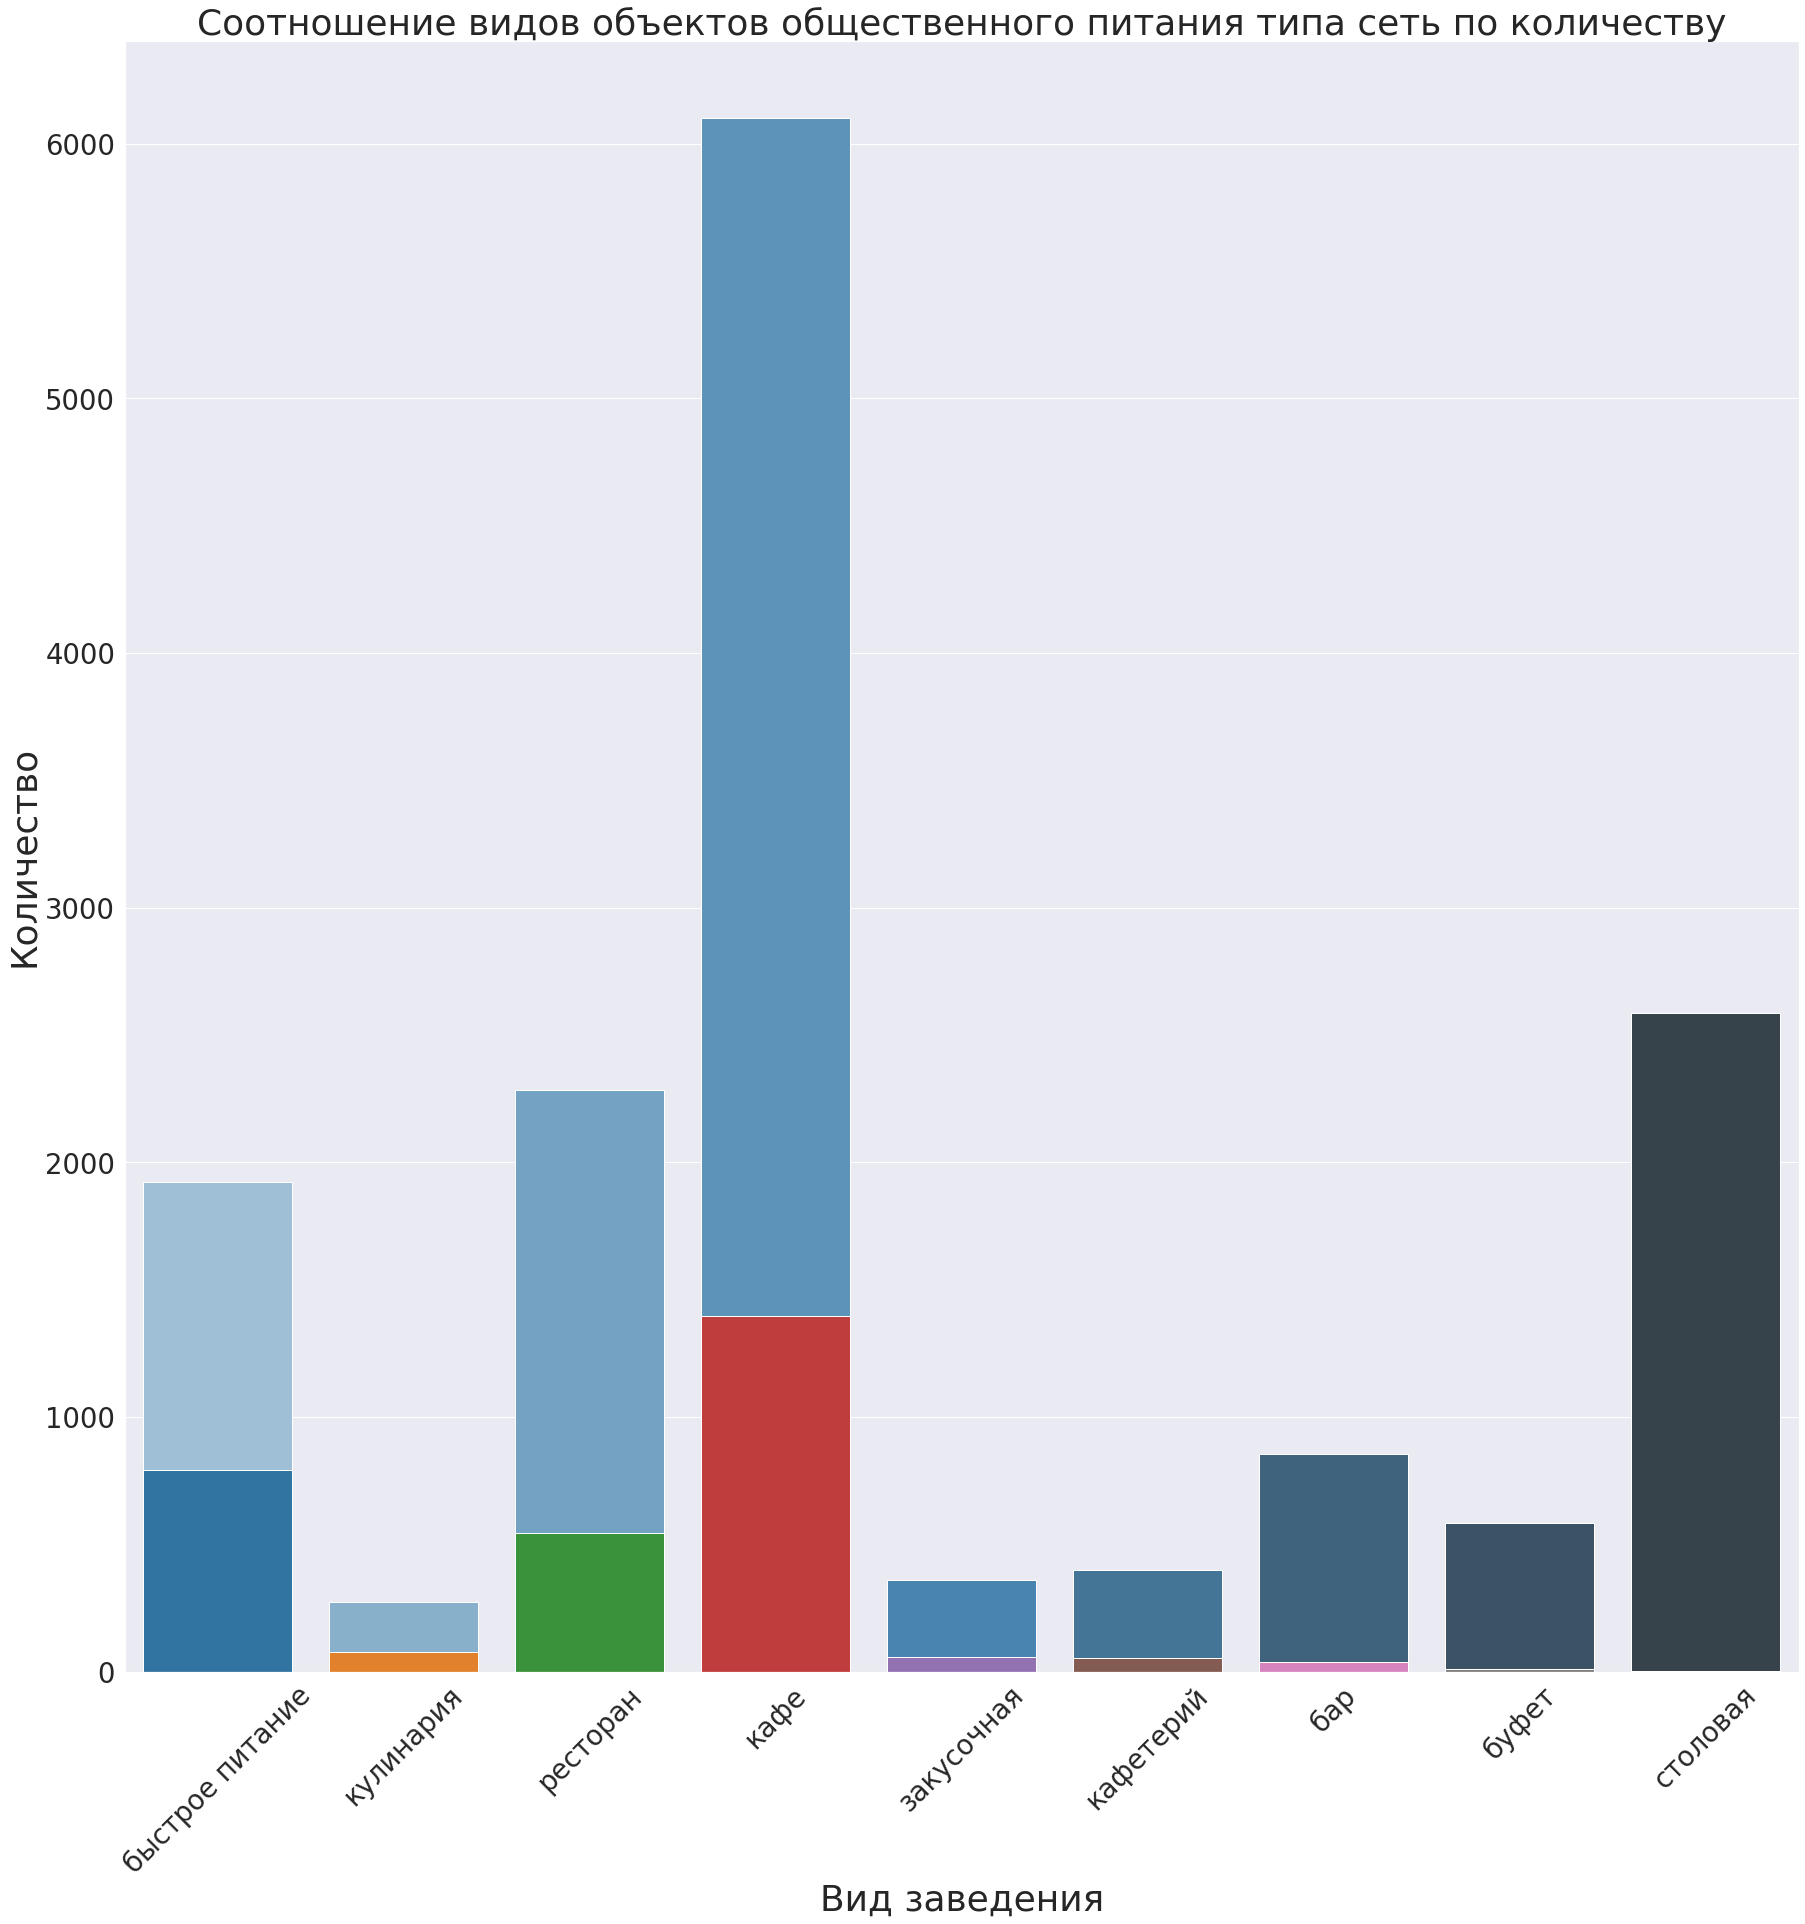

In [21]:
plt.figure(figsize=(30,30))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='total', x=object_type_chain_set.index, data=object_type_chain_set, palette="Blues_d") 
sns.barplot(y='chain',x=object_type_chain_set.index, data=object_type_chain_set, palette="tab10") 
plt.title('Cоотношение видов объектов общественного питания типа сеть по количеству', size=36)
plt.xlabel('Вид заведения', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=45)
plt.show()

### Тройка лидеров среди сетевых организаций питания с большим отрывом - быстрое питание, кулинария, ресторан, кафе, закусочная кофетерий. Остальные встречаются значительно реже.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало       заведений с большим количеством посадочных мест?
<a class="anchor" id="5"></a>

Среднее количество мест для всех заведений.

In [22]:
object_type_number=data.groupby('object_type').agg({'id':'count', 'number':'mean'})
object_type_number=object_type_number.sort_values(by='id',ascending = False).reset_index()
object_type_number

,object_type,id,number
0,кафе,6099,39.716019
1,столовая,2587,130.246618
2,ресторан,2285,96.834136
3,быстрое питание,1923,20.552262
4,бар,856,43.494159
5,буфет,585,51.129915
6,кафетерий,398,9.123116
7,закусочная,360,7.608333
8,кулинария,273,5.589744


Среднее количество мест для сетевых заведений.

In [23]:
object_type_chain_number=data_chain.groupby('object_type').agg({'id':'count', 'number':'mean'})
object_type_chain_number=object_type_chain_number.sort_values(by='number',ascending = False).reset_index()
object_type_chain_number

,object_type,id,number
0,столовая,3,112.333333
1,ресторан,544,100.233456
2,бар,37,53.027027
3,кафе,1396,47.426934
4,быстрое питание,791,40.166877
5,закусочная,56,14.375000
6,буфет,11,12.727273
7,кафетерий,52,12.269231
8,кулинария,78,8.679487


In [24]:
chain_object_number = (data_chain
                                .groupby('object_name')['number']
                                .agg({'count','mean'})
                                .sort_values('count', ascending=False)
                                .reset_index())
chain_object_number

,object_name,mean,count
0,шоколадница,57.184713,157
1,kfc,55.341935,155
2,макдоналдс,87.119205,151
3,бургер кинг,46.649635,137
4,теремок,25.606383,94
...,...,...,...
572,кафе «хлеб насущный»,38.000000,1
573,кафе «урюк» хивинская чайхона,50.000000,1
574,кафе «торнадо»,80.000000,1
575,кафе «тапчан»,70.000000,1


In [25]:
chain_object_number.describe()

,mean,count
count,577.000000,577.000000
mean,59.123153,5.143847
std,54.537296,15.554623
min,0.000000,1.000000
25%,20.000000,1.000000
50%,43.500000,1.000000
75%,83.333333,3.000000
max,306.000000,157.000000


In [26]:
percentil_number=np.percentile(chain_object_number['mean'], 90)
percentil_count=np.percentile(chain_object_number['count'], 90)
print(percentil_number,percentil_count)

128.59999999999994 8.399999999999977


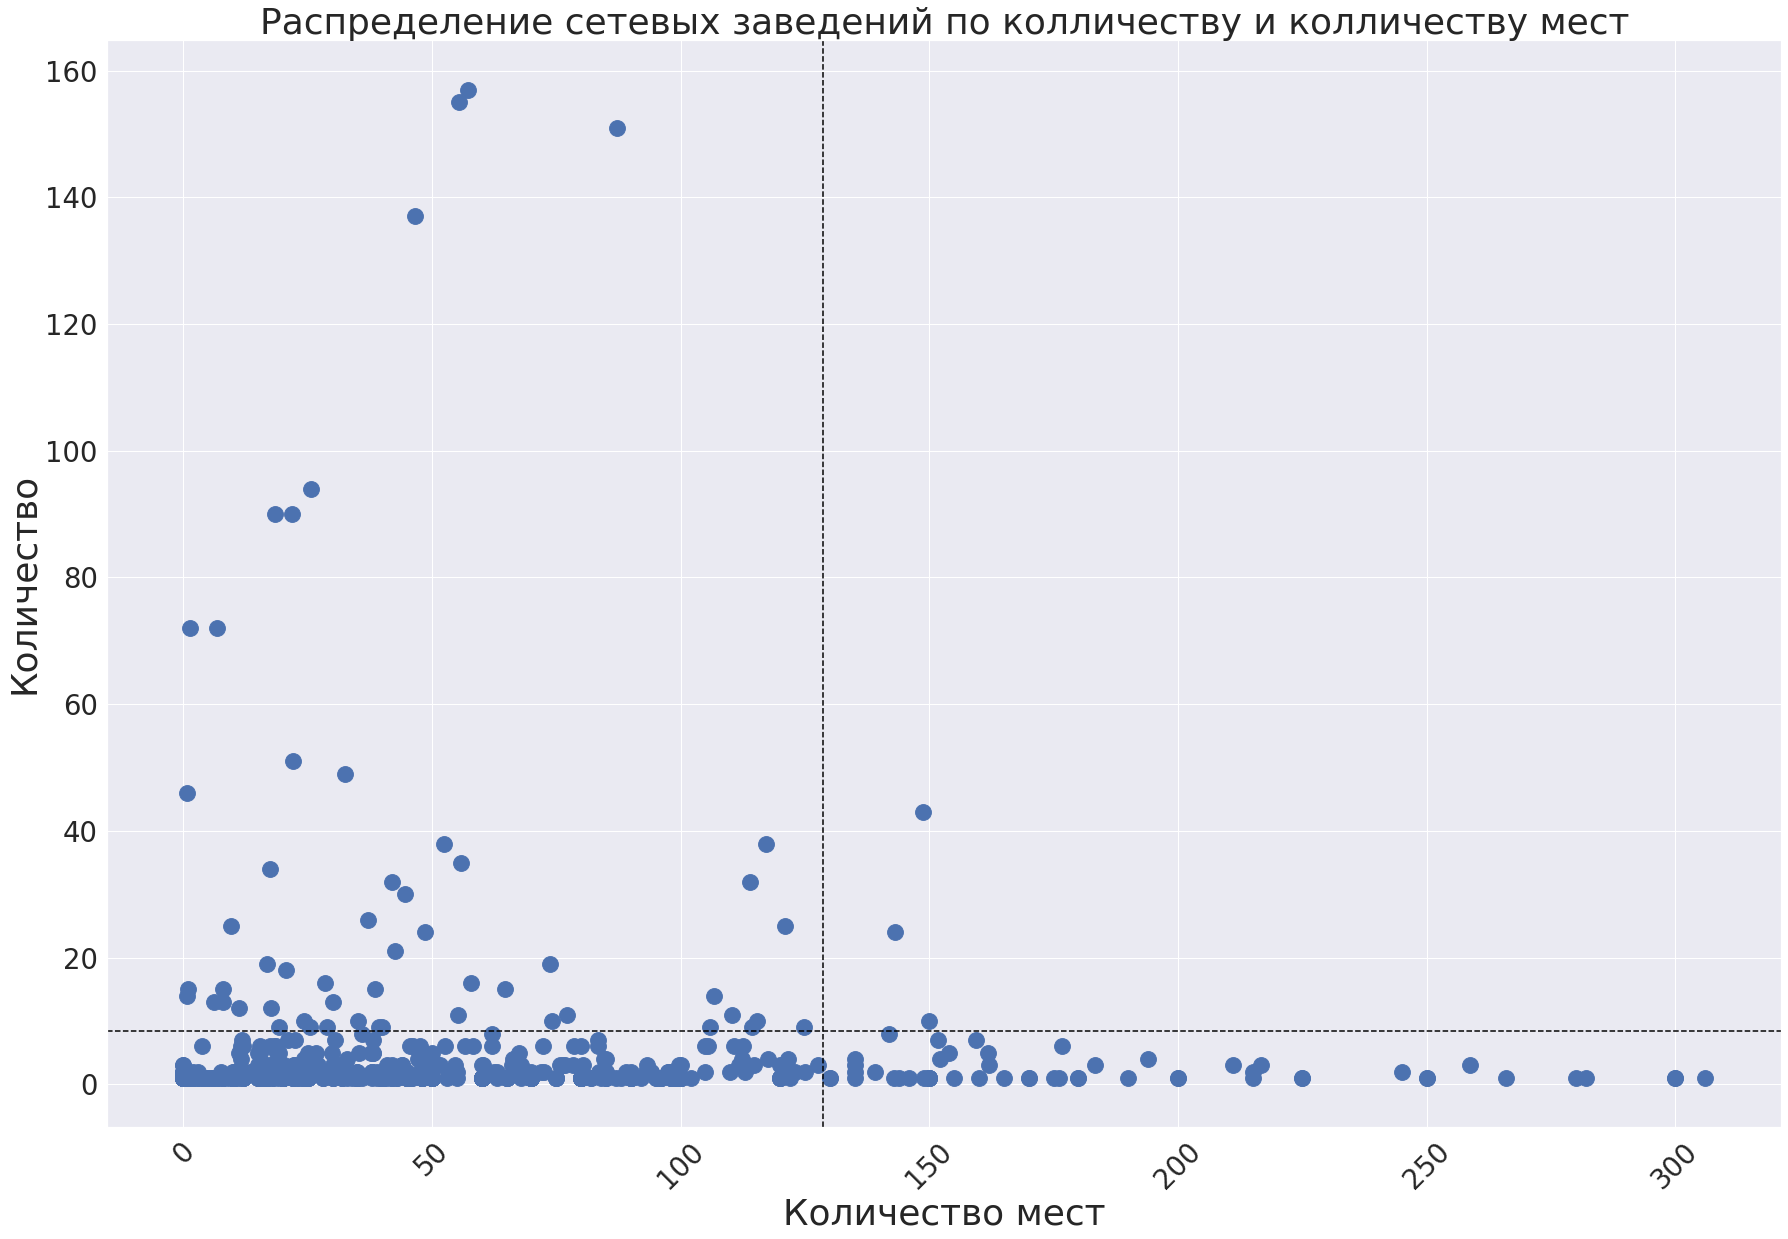

In [27]:
plt.figure(figsize=(30,20))
plt.scatter(x='mean', y='count',  data=chain_object_number,s=250);
plt.title('Распределение сетевых заведений по колличеству и колличеству мест', size=36)
plt.xlabel('Количество мест', size=36)
plt.ylabel('Количество', size=36)
plt.axhline(percentil_count, linestyle='--', color='black')
plt.axvline(percentil_number, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.show()





#### Для сетевых заведений характерно в среднем меньшее количество заведений при большем количество посадочных мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид             предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a class="anchor" id="6"></a>

In [28]:
object_type_number=object_type_number.sort_values(by='number',ascending = False)
object_type_number['number']= object_type_number['number'].round(0).astype('int')
object_type_number

,object_type,id,number
1,столовая,2587,130
2,ресторан,2285,97
5,буфет,585,51
4,бар,856,43
0,кафе,6099,40
3,быстрое питание,1923,21
6,кафетерий,398,9
7,закусочная,360,8
8,кулинария,273,6


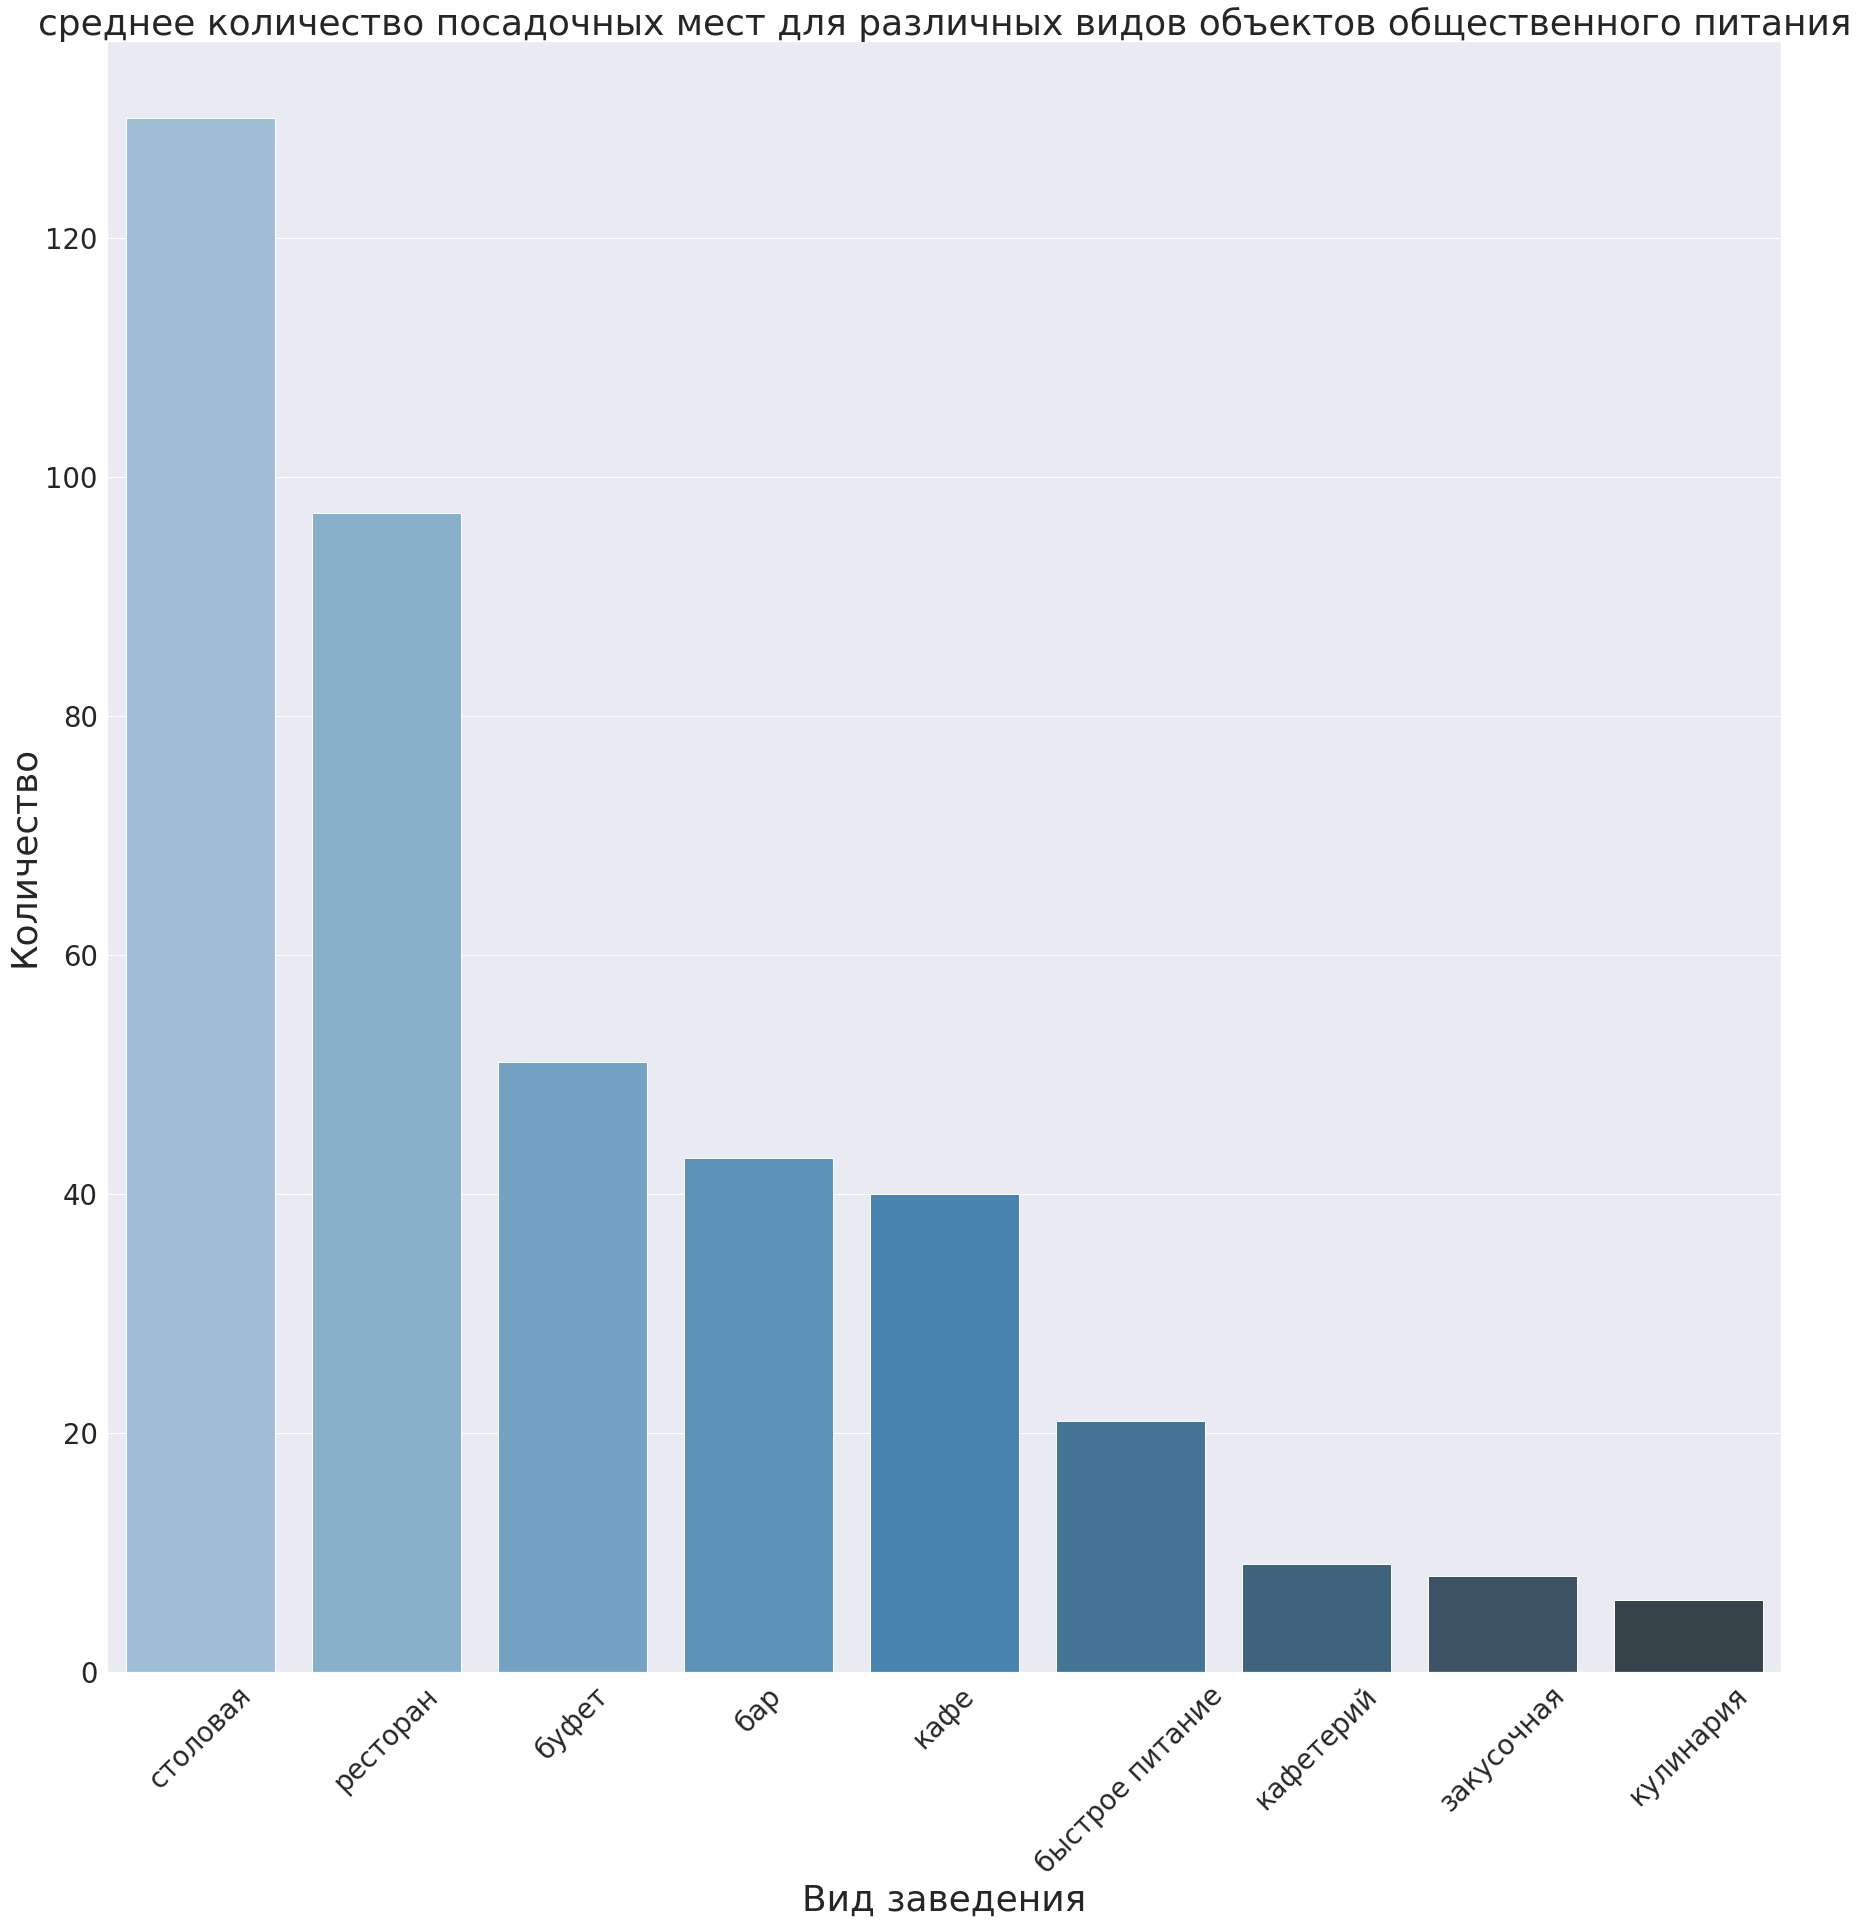

In [29]:
plt.figure(figsize=(30,30))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='number', x='object_type', data=object_type_number, palette="Blues_d") 
plt.title('среднее количество посадочных мест для различных видов объектов общественного питания', size=36)
plt.xlabel('Вид заведения', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=45)
plt.show()

Ожидаемо самое большее количество посадочных мест предлагают столовые.

### Выделите в отдельный столбец информацию об улице из столбца address .
<a class="anchor" id="7"></a>

In [30]:
def strit(strit):
        if strit.split(",")[1]:
            if strit.split(",")[1].strip().split(' ')[0]!='город' and strit.split(",")[1].strip().split(' ')[0]!='поселение' and strit.split(",")[1].strip().split(' ')[0]!='дом' and strit.split(",")[1].strip().split(' ')[0]!='деревня':
                return strit.split(",")[1].strip()
        else:
            return 0

data['strit']=data['address'].apply(strit)
data

,id,object_name,chain,object_type,address,number,strit
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,True,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,True,кафе,"город москва, поселение московский, киевское ш...",36,None


In [31]:
data['strit'].unique()

array(['улица егора абакумова', 'улица талалихина',
       'абельмановская улица', ..., '2-й кадашёвский переулок',
       'новорижское шоссе', 'улица василисы кожиной'], dtype=object)

In [32]:
data['strit'].isna().sum() 

881

#### Для 881 одного обьекта улица не определилась. Допустимо учитывая, что в списке адресов присутствуют города, деревни, поселения, пока оставим как есть.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней  информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a class="anchor" id="8"></a>

Загрузим и подготовим внешний дата сет.

In [33]:
data_street=pd.read_csv('https://genalll.github.io/setData/street.csv')
data_street.rename(columns={'streetname': 'strit'}, inplace=True)
data_street['strit'] = data_street['strit'].str.strip()
data_street['strit']=data_street['strit'].str.lower()
data_street

,strit,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


In [34]:
data['strit'].unique()

array(['улица егора абакумова', 'улица талалихина',
       'абельмановская улица', ..., '2-й кадашёвский переулок',
       'новорижское шоссе', 'улица василисы кожиной'], dtype=object)

In [35]:
data_area=data.merge(data_street,on='strit',how='left')

In [36]:
data_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29960 entries, 0 to 29959
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           29960 non-null  int64  
 1   object_name  29960 non-null  object 
 2   chain        29960 non-null  bool   
 3   object_type  29960 non-null  object 
 4   address      29960 non-null  object 
 5   number       29960 non-null  int64  
 6   strit        29079 non-null  object 
 7   areaid       28892 non-null  float64
 8   okrug        28892 non-null  object 
 9   area         28892 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.3+ MB


In [37]:
street_top = data.groupby('strit').agg({'id':'count'}).sort_values(by='id', ascending=False)
strit_top_10 = street_top.head(10).reset_index()
strit_top_10

,strit,id
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


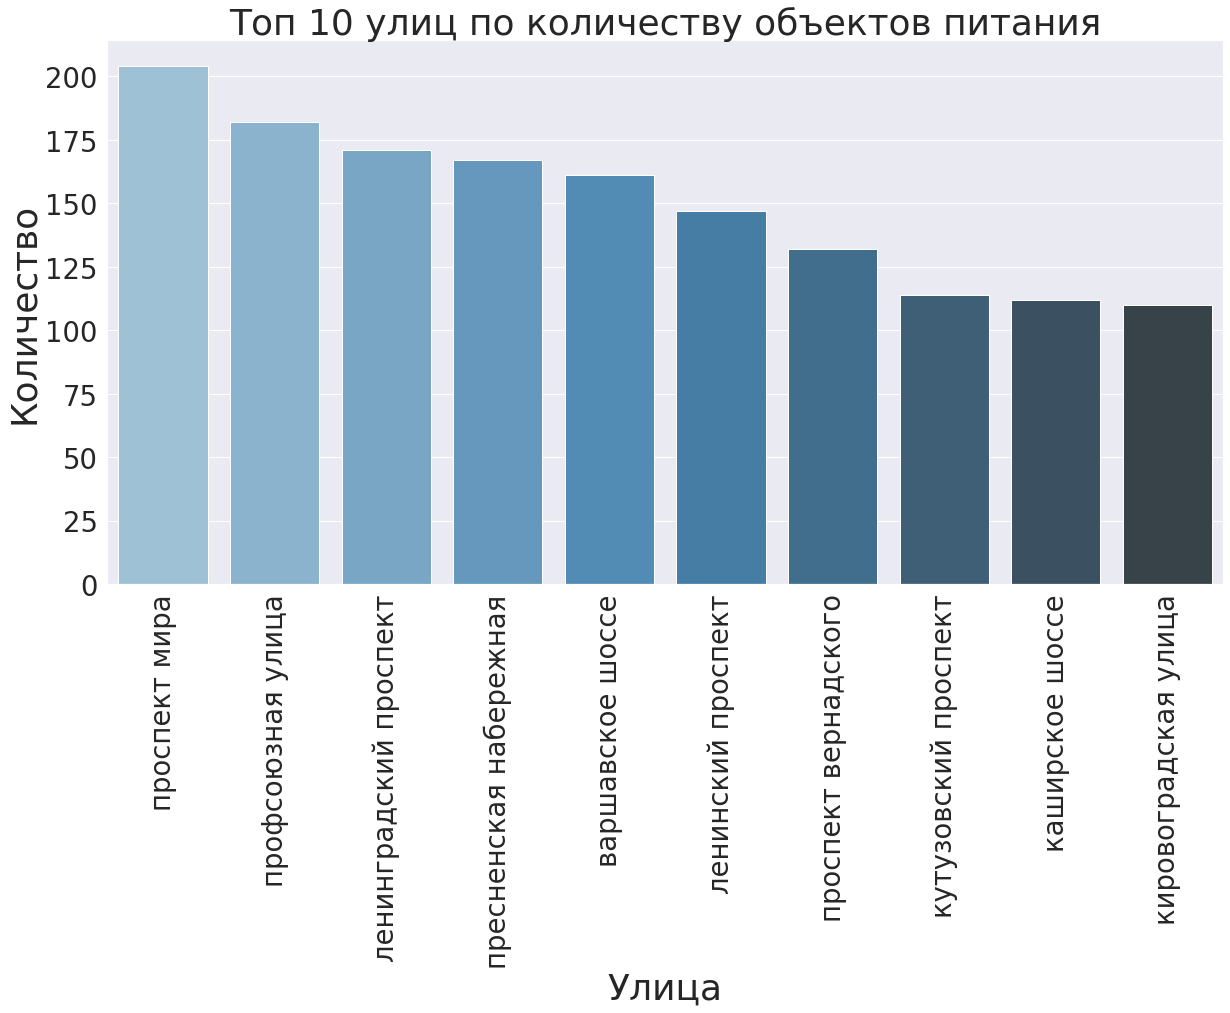

In [38]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='id', x='strit', data= strit_top_10, palette="Blues_d") 
plt.title('Топ 10 улиц по количеству объектов питания', size=36)
plt.xlabel('Улица', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=90)
plt.show()

In [39]:
streets_area_top_10 = strit_top_10.merge(data_street, how='left', left_on='strit', right_on='strit')
streets_area_top_10

,strit,id,areaid,okrug,area
0,проспект мира,204,70,СВАО,Алексеевский район
1,проспект мира,204,86,СВАО,Ярославский Район
2,проспект мира,204,78,СВАО,Район Марьина роща
3,проспект мира,204,79,СВАО,Останкинский район
4,проспект мира,204,81,СВАО,Район Ростокино
5,проспект мира,204,82,СВАО,Район Свиблово
6,проспект мира,204,16,ЦАО,Мещанский район
7,профсоюзная улица,182,123,ЮЗАО,Академический район
8,профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Обнаружилась особенность: одна улица может проходить в нескольких районах.

In [40]:
print('Районы топ-10 улиц по количеству объектов общественного питания')
for i in streets_area_top_10['area'].unique():
    print(i)

Районы топ-10 улиц по количеству объектов общественного питания
Алексеевский район
Ярославский Район
Район Марьина роща
Останкинский район
Район Ростокино
Район Свиблово
Мещанский район
Академический район
Район Черемушки
Район Ясенево
Район Коньково
Обручевский район
Район Теплый Стан
Район Аэропорт
Район Беговой
Хорошевский район
Район Сокол
Пресненский район
Район Чертаново Центральное
Район Чертаново Северное
Район Чертаново Южное
Донской район
Район Нагатино-Садовники
Нагорный район
Район Северное Бутово
Район Южное Бутово
Район Проспект Вернадского
Район Тропарево-Никулино
Район Гагаринский
Ломоносовский район
Район Якиманка
Район Раменки
Район Дорогомилово
Район Фили-Давыдково
Район Москворечье-Сабурово
Район Орехово-Борисово Южное
Район Орехово-Борисово Северное


### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a class="anchor" id="9"></a>

In [41]:
street_top_one=street_top.query('id==1')
street_top_one=street_top_one.merge(data_street, how='left', left_on='strit', right_on='strit')

In [42]:
street_top_one.dropna()

,strit,id,areaid,okrug,area
2,улица рогова,1,93.0,СЗАО,Район Щукино
3,5-й рощинский проезд,1,98.0,ЮАО,Даниловский район
4,улица рогожский посёлок,1,117.0,ЮВАО,Нижегородский район
5,улица саляма адиля,1,92.0,СЗАО,Район Хорошево-Мневники
6,5-й монетчиковский переулок,1,14.0,ЦАО,Район Замоскворечье
...,...,...,...,...,...
583,егорьевский проезд,1,115.0,ЮВАО,Район Люблино
584,улица инессы арманд,1,134.0,ЮЗАО,Район Ясенево
585,елоховский проезд,1,13.0,ЦАО,Басманный район
586,есенинский бульвар,1,113.0,ЮВАО,Район Кузьминки


In [43]:
print('Районы улиц c одним объектом общественного питания')
for i in street_top_one.dropna()['area'].unique():
    print(i)

Районы улиц c одним объектом общественного питания
Район Щукино
Даниловский район
Нижегородский район
Район Хорошево-Мневники
Район Замоскворечье
Район Марьина роща
Район Солнцево
Район Хамовники
Район Богородское
Ярославский Район
Бабушкинский район
Южнопортовый Район
Район Ясенево
Таганский район
Район Митино
Тверской район
Район Ивановское
Район Лефортово
Хорошевский район
Район Сокол
Останкинский район
Район Люблино
Район Выхино-Жулебино
Район Южное Бутово
Район Печатники
Головинский район
Красносельский район
Район Сокольники
Район Якиманка
Район Северный
Рязанский район
Район Арбат
Савеловский район
Мещанский район
Район Бирюлево Восточное
Район Кунцево
Район Котловка
Басманный район
Бескудниковский Район
Бутырский район
Район Соколиная Гора
Район Аэропорт
Район Южное Тушино
Район Внуково
Пресненский район
Тимирязевский Район
Район Зюзино
Можайский Район
Район Западное Дегунино
Район Коптево
Район Отрадное
Район Очаково-Матвеевское
Район Ново-Переделкино
Район Дорогомилово
Район 

Найдем еще округа для укрупнения, районов слишком много.

In [44]:
okrug_top_one=street_top_one.dropna().groupby('okrug').agg({'id':'count'}).sort_values(by='id')
print(okrug_top_one.head(5))

            id
okrug         
Зеленоград   1
СЗАО        27
ЮЗАО        27
ЮАО         30
ЗАО         41


Округа с минимальным количеством заведений общепита.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
<a class="anchor" id="10"></a>

In [45]:
strit_10= strit_top_10['strit'].unique()
data.query('strit in @strit_10')


,id,object_name,chain,object_type,address,number,strit
151,155973,кафе «андерсон»,True,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,True,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,False,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,False,быстрое питание,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,False,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,додо пицца,True,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная
15325,198436,милти,True,быстрое питание,"город москва, ленинградский проспект, дом 80, ...",0,ленинградский проспект
15347,222491,кальянная «мята lounge»,True,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица
15350,213061,мята,True,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе


In [46]:
object_type_number_top=data.query('strit in @strit_10').groupby('object_type').agg({'id':'count', 'number':'mean'})
object_type_number_top=object_type_number_top.sort_values(by='number',ascending = False).reset_index()
object_type_number_top['number']= object_type_number['number'].round(0).astype('int')
object_type_number_top=object_type_number_top.sort_values(by = 'number',ascending = False).reset_index()
object_type_number_top

,index,object_type,id,number
0,1,ресторан,291,130
1,2,бар,63,97
2,5,быстрое питание,257,51
3,4,кафе,632,43
4,0,столовая,137,40
5,3,буфет,32,21
6,6,закусочная,17,9
7,7,кафетерий,47,8
8,8,кулинария,24,6


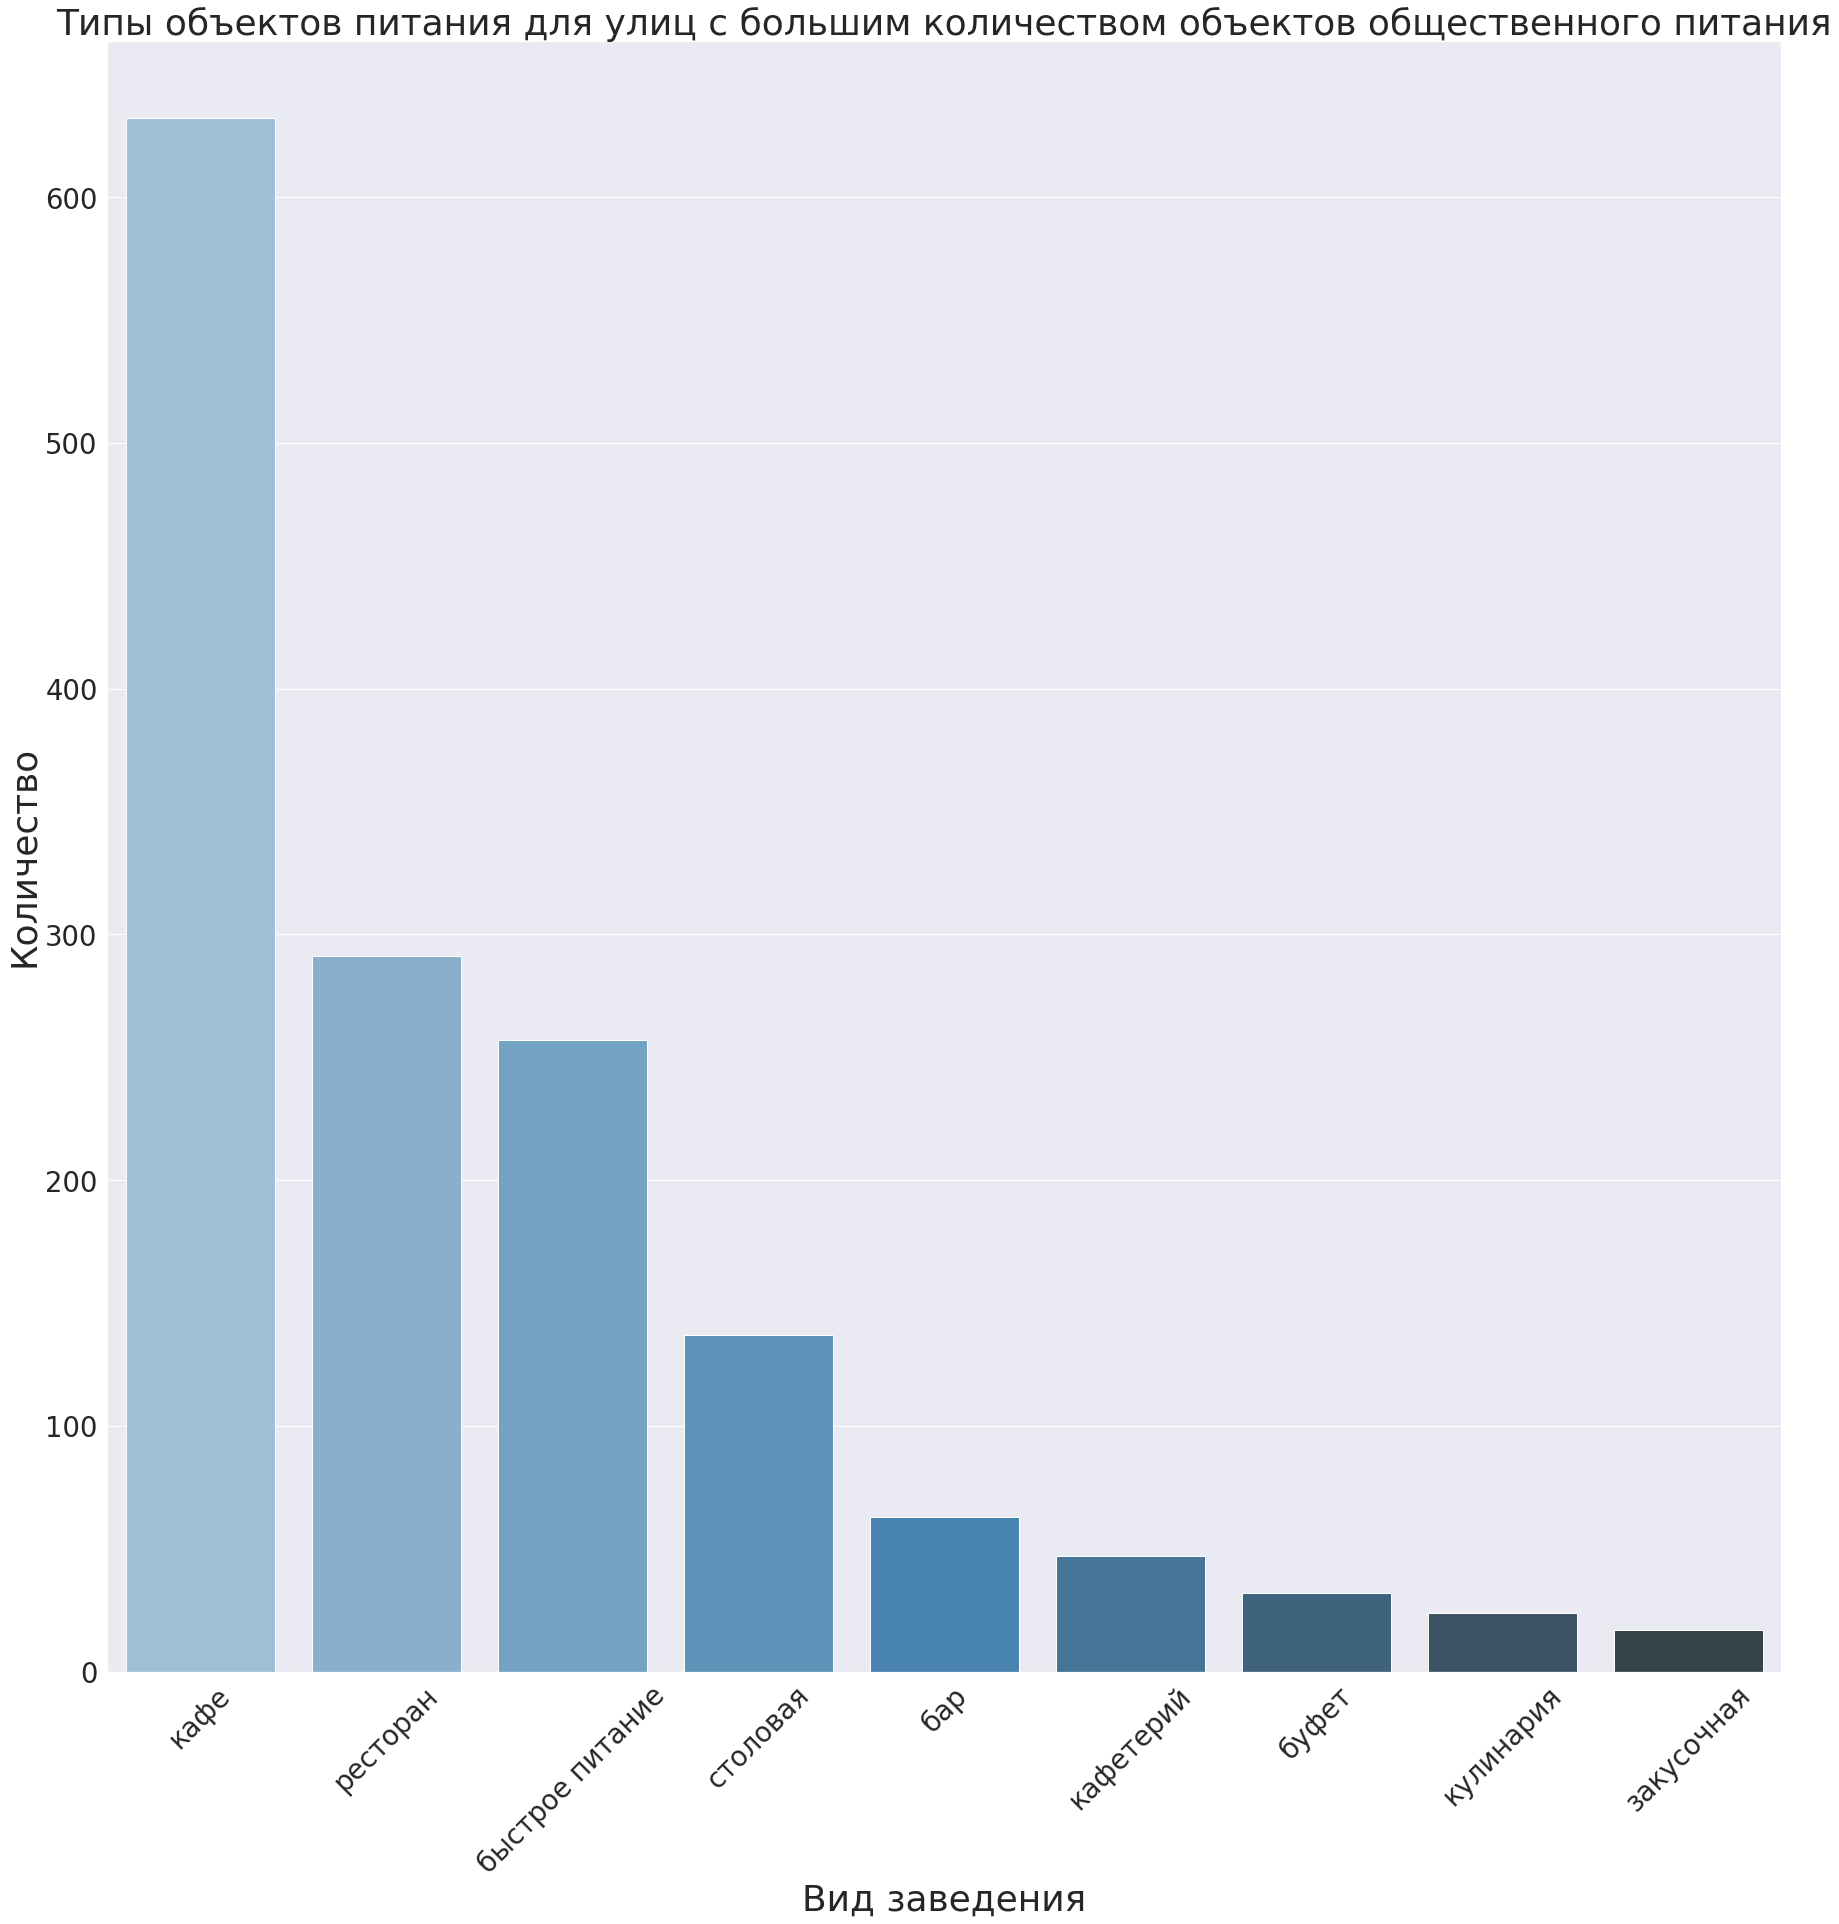

In [47]:
plt.figure(figsize=(30,30))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='id', x='object_type', data= object_type_number_top.sort_values(by = 'id',ascending = False).reset_index(), palette="Blues_d") 
plt.title('Типы объектов питания для улиц с большим количеством объектов общественного питания', size=36)
plt.xlabel('Вид заведения', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=45)
plt.show()

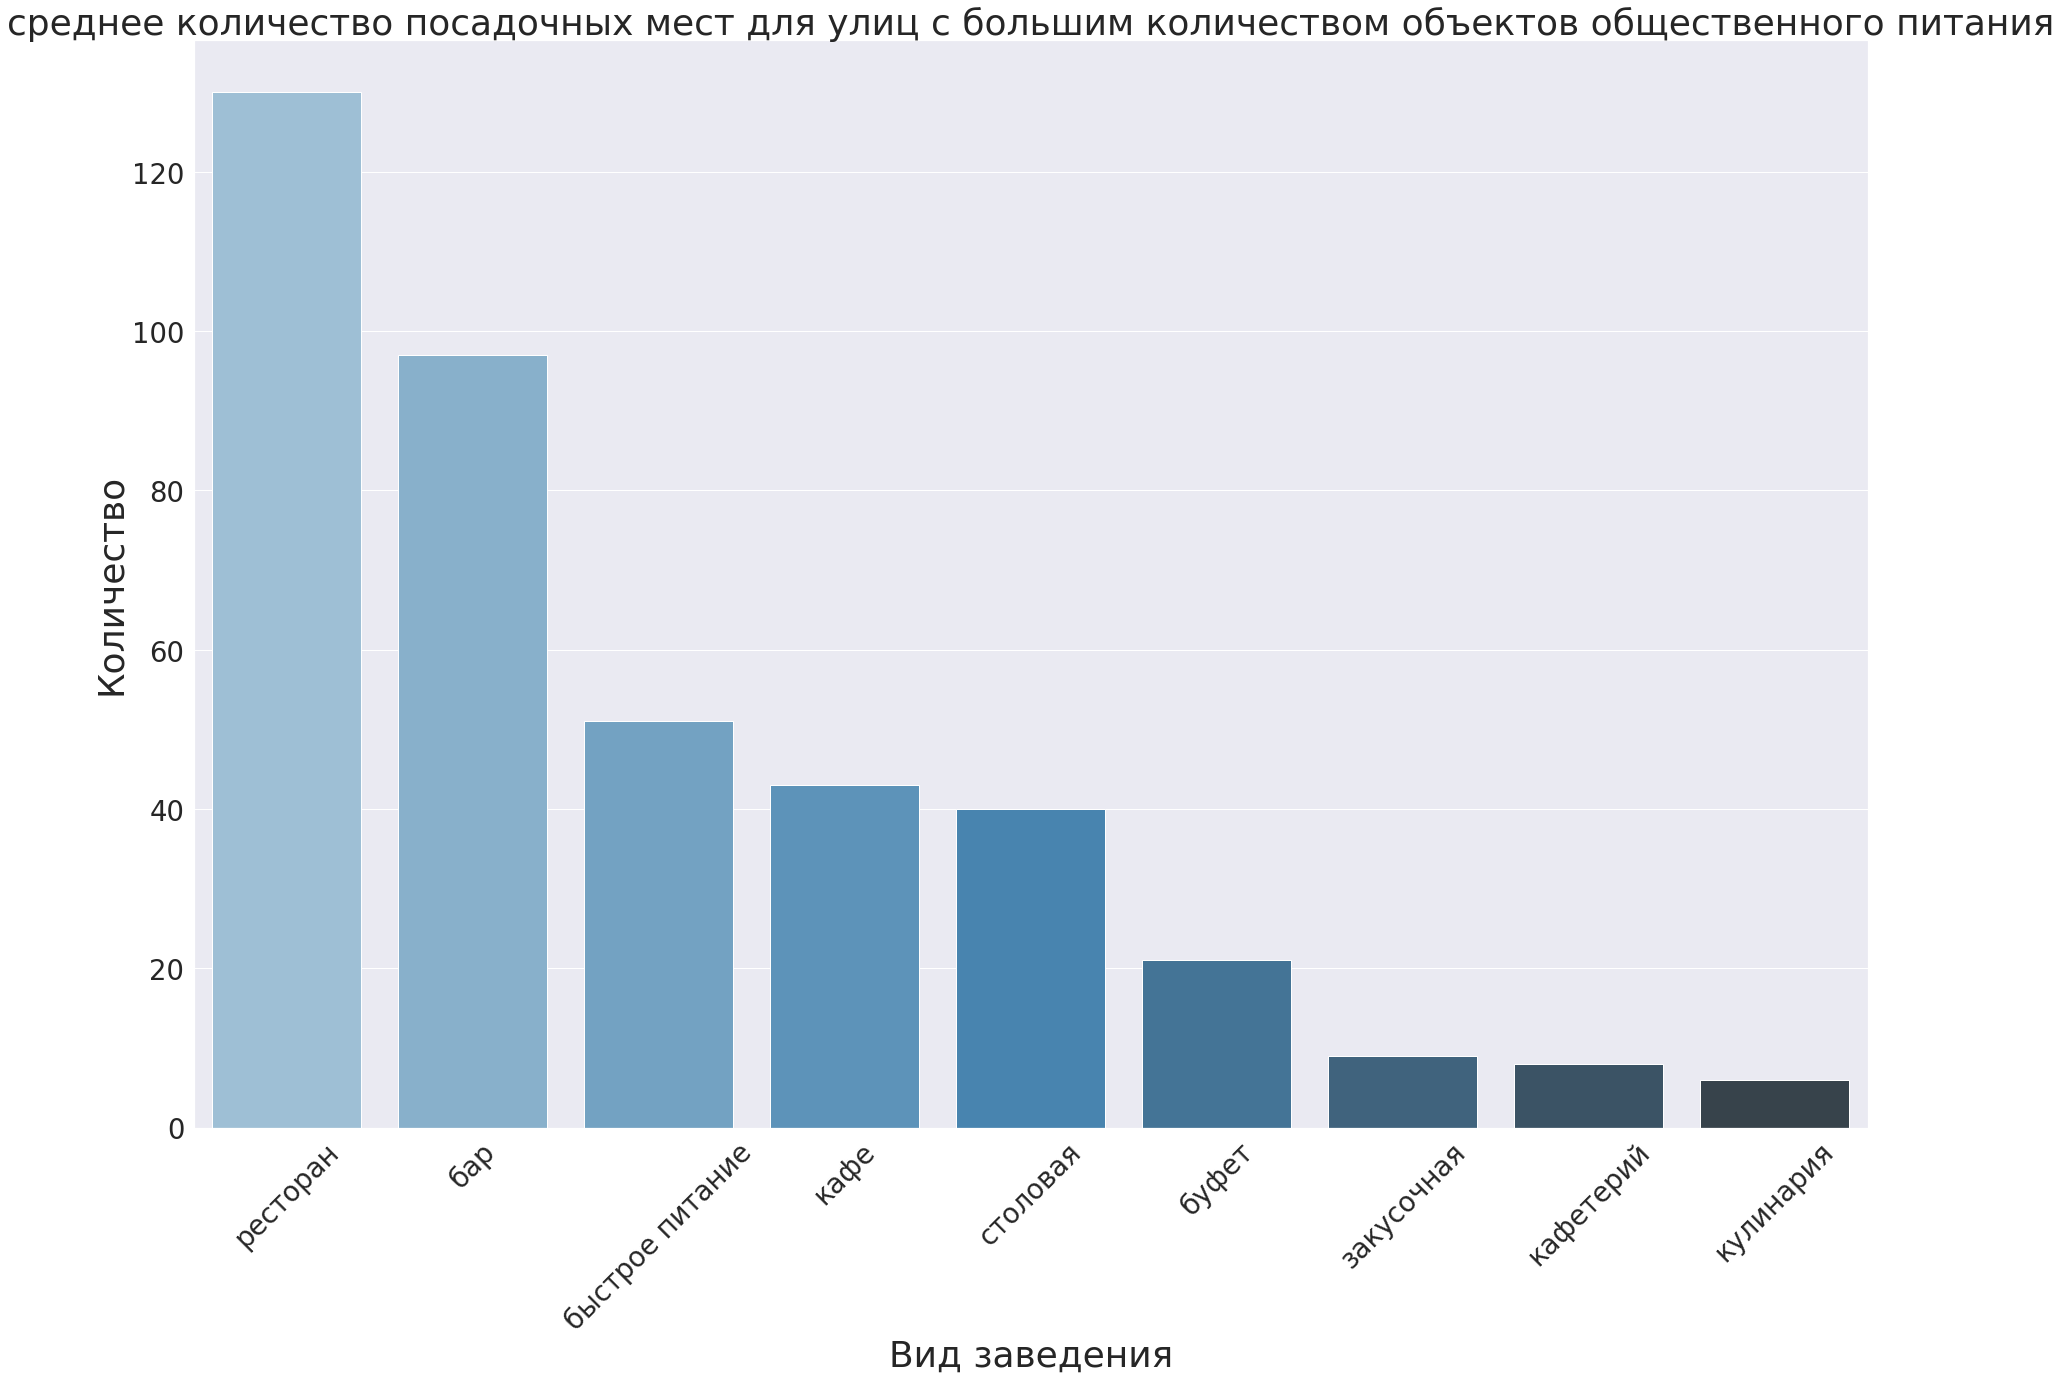

In [48]:
plt.figure(figsize=(30,20))
sns.set_context("paper", font_scale=2)
sns.set_theme(style="whitegrid")
sns.set(font_scale=2.5)
sns.barplot(y='number', x='object_type', data=object_type_number_top, palette="Blues_d") 
plt.title('среднее количество посадочных мест для улиц с большим количеством объектов общественного питания', size=36)
plt.xlabel('Вид заведения', size=36)
plt.ylabel('Количество', size=36)
plt.xticks(rotation=45)
plt.show()

#### Для улиц с большим количеством объектов питания характерно некоторое отличие типа заведений и колличества мест.
* В тройке лидеров по типу заведения - кафе, ресторан, быстрое питание. Значительно меньше столовых.
* По количеству посадочных мест - ресторан, бар, быстрое питание. Столовая только на пятом месте.

## Общий вывод
<a class="anchor" id="11"></a>

#### Проанализировав открытые данные о заведениях общественного питания в Москве,
#### пришли к следующим выводам.

* В целом по количеству заведений в Москве с большим отрывом лидирует кафе. Далее столовая ресторан и быстрое питание.
* 80,68% заведений питания в Москве не сетевые.
* Среди сетевых заведений преобладают кафе, фаст фуд , ресторан. Остальные встречаються значительно реже.
* В общем по Москве по количеству посадочных мест лидируют столовые.
* Улицы-лидеры по количеству заведений общепита:
                                         проспект мира 
                                         профсоюзная улица
                                         ленинградский проспект
                                         пресненская набережная
                                         варшавское шоссе
                                         ленинский проспект
                                         проспект вернадского
                                         кутузовский проспект
                                         каширское шоссе
                                         кировоградская улица
                                         
* Районы-лидеры по количеству заведений общепита:
Алексеевский район
Ярославский Район
Район Марьина роща
Останкинский район
Район Ростокино
Район Свиблово
Мещанский район
Академический район
Район Черемушки
Район Ясенево
Район Коньково
Обручевский район
Район Теплый Стан
Район Аэропорт
Район Беговой
Хорошевский район
Район Сокол
Пресненский район
Район Чертаново Центральное
Район Чертаново Северное
Район Чертаново Южное
Донской район
Район Нагатино-Садовники
Нагорный район
Район Северное Бутово
Район Южное Бутово
Район Проспект Вернадского
Район Тропарево-Никулино
Район Гагаринский
Ломоносовский район
Район Якиманка
Район Раменки
Район Дорогомилово
Район Фили-Давыдково
Район Москворечье-Сабурово
Район Орехово-Борисово Южное
Район Орехово-Борисово Северное

* Районы улиц c минимальным количеством объектов питания:
Район Щукино
Даниловский район
Нижегородский район
Район Хорошево-Мневники
Район Замоскворечье
Район Марьина роща
Район Солнцево
Район Хамовники
Район Богородское
Ярославский Район
Бабушкинский район
Южнопортовый Район
Район Ясенево
Таганский район
Район Митино
Тверской район
Район Ивановское
Район Лефортово
Хорошевский район
Район Сокол
Останкинский район
Район Люблино
Район Выхино-Жулебино
Район Южное Бутово
Район Печатники
Головинский район
Красносельский район
Район Сокольники
Район Якиманка
Район Северный
Рязанский район
Район Арбат
Савеловский район
Мещанский район
Район Бирюлево Восточное
Район Кунцево
Район Котловка
Басманный район
Бескудниковский Район
Бутырский район
Район Соколиная Гора
Район Аэропорт
Район Южное Тушино
Район Внуково
Пресненский район
Тимирязевский Район
Район Зюзино
Можайский Район
Район Западное Дегунино
Район Коптево
Район Отрадное
Район Очаково-Матвеевское
Район Ново-Переделкино
Район Дорогомилово
Район Измайлово
Район Свиблово
Район Фили-Давыдково
Район Чертаново Южное
Район Покровское-Стрешнево
Район Гольяново
Район Раменки
Район Ростокино
Район Текстильщики
Алексеевский район
Нагорный район
Район Преображенское
Район Северное Измайлово
Район Восточное Измайлово
Лосиноостровский район
Район Северное Медведково
Район Южное Медведково
Район Кузьминки
Войковский Район
Донской район
Район Матушкино-Савелки
Район Перово
Район Филевский Парк
Район Беговой
Район Северное Бутово
Дмитровский район
Район Новогиреево
Район Косино-Ухтомский
Район Куркино
Район Чертаново Северное
Район Строгино
Район Черемушки
Район Восточный
Район Коньково
Обручевский район
Район Марфино
Район Гагаринский
Алтуфьевский район
Район Нагатино-Садовники
Район Левобережный
Молжаниновский район
Район Царицыно
Район Метрогородок
Район Марьино
Район Москворечье-Сабурово

##### Для улиц с большим количеством объектов питания характерно некоторое отличие типа заведений и количества мест.

* В тройке лидеров по типу заведения - кафе, ресторан, быстрое питание. Значительно меньше столовых.
* По количеству посадочных мест - ресторан, бар, быстрое питание. Столовая только на пятом мете.

## Общие рекомендации.
* Для открытия подобного рода кафе необходимо искать наимение нагруженную подобными заведениями улицу, среди районов с минимальным колличеством заведений. При этом нельзя опираться только на геофактор - можно оказаться в промзоне, например(ошибка выжившего :)).
* Оптимальный тип - кафе или фастфуд. Среди сетевых заведений преобладают эти типы.
* Оптимальное число посадочных мест - 40-50 (замахиваемся на создание сети в будующем).

## Презентация:
<a class="anchor" id="12"></a>

### Ссылка на презентацию.

https://disk.yandex.ru/i/8_luSIObNURIrQ